<h1>Day 6 - Red Lions everywhere</h1>

In [1]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
out='fsanand.csv'

<a>https://ratings.food.gov.uk/open-data-resources/documents/api-guidance.pdf</a>

In [2]:
#surl='http://ratings.food.gov.uk//search/en-gb/Nando/^/xml'
surl='http://ratings.food.gov.uk/search-name/en-gb/RED/1/2000/xml'

#surl='http://ratings.food.gov.uk/enhanced-search/en-GB/^/^/ALPHA/0/250/1/5000/xml'
uClient = uReq(surl)
pagehtml = uClient.read()
uClient.close()
psoup = soup(pagehtml,"xml")

In [3]:
with open(out, 'w', newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Name','Type','Lon','Lat','PostCode','Rating','dtRate'])
    for est in psoup.find_all("EstablishmentDetail"):
        nm = est.find('BusinessName').text
        ty = est.find('BusinessType').text
        pc= est.find('PostCode').text
        dt= est.find('RatingDate').text
        lat=est.find('Latitude').text
        lon = est.find('Longitude').text
        rat=est.find('RatingValue').text
        writer.writerow([nm, ty, lon, lat, pc, rat,dt])

In [4]:
dfX=pd.read_csv(out)
dfX.sort_values('Name', ascending=False)

,Name,Type,Lon,Lat,PostCode,Rating,dtRate
1489,Ye Olde Red Lion Hotel,Pub/bar/nightclub,-1.400351,52.624440,CV13 0LL,5,19 September 2018
1488,Ye Olde Red Lion,Pub/bar/nightclub,-2.456642,53.413853,WA3 6JT,0,20 December 2019
1487,Ye Olde Red Lion,Pub/bar/nightclub,-1.315506,51.458840,RG20 8XB,4,08 March 2019
1486,Ye Olde Red Lion,Pub/bar/nightclub,-0.179996,52.918934,PE20 3EF,5,14 September 2018
1485,Ye Olde Red Lion,Pub/bar/nightclub,-0.766669,53.838524,YO43 4AD,5,03 September 2018
...,...,...,...,...,...,...,...
4,BBQ Hut Peri Peri / Red Rooster Peri Peri,Restaurant/Cafe/Canteen,NaN,NaN,G81 2LQ,Awaiting Inspection,08 January 2020
3,Aspens Services At Red Hill CoE School,School/college/university,-2.204351,52.183575,WR5 2HX,5,20 April 2018
2,Alliance In Partnership At Red Gates School,School/college/university,-0.046919,51.350994,CR2 8HD,5,11 December 2018
1,A R Melvin - Red Fox Catering,Other catering premises,NaN,NaN,KY4,Pass,13 February 2015


In [14]:
dfX=dfX[dfX.Name.str.contains('Red Lion')]
dfX

,Name,Type,Lon,Lat,PostCode,Rating,dtRate,geometry
10,Boneyard Red Lion Works,Restaurant/Cafe/Canteen,-3.522345,50.727550,EX1 2AL,5,19 February 2020,POINT (-3.52235 50.72755)
12,BP Service Station Red Lion,Retailers - other,-2.206513,53.396076,SK8 2BG,5,27 June 2017,POINT (-2.20651 53.39608)
60,Creative Care - The Old Red Lion,Caring Premises,-0.825099,53.303978,DN22 0EJ,5,14 August 2018,POINT (-0.82510 53.30398)
65,"Eat, Drink & Sleep Ltd T/a The Red Lion Inn",Pub/bar/nightclub,-2.280184,52.515020,DY7 5DU,3,17 September 2019,POINT (-2.28018 52.51502)
82,Jamps at the Red Lion,Restaurant/Cafe/Canteen,-1.109607,53.432686,DN11 9LX,5,03 September 2020,POINT (-1.10961 53.43269)
...,...,...,...,...,...,...,...,...
1485,Ye Olde Red Lion,Pub/bar/nightclub,-0.766669,53.838524,YO43 4AD,5,03 September 2018,POINT (-0.76667 53.83852)
1486,Ye Olde Red Lion,Pub/bar/nightclub,-0.179996,52.918934,PE20 3EF,5,14 September 2018,POINT (-0.18000 52.91893)
1487,Ye Olde Red Lion,Pub/bar/nightclub,-1.315506,51.458840,RG20 8XB,4,08 March 2019,POINT (-1.31551 51.45884)
1488,Ye Olde Red Lion,Pub/bar/nightclub,-2.456642,53.413853,WA3 6JT,0,20 December 2019,POINT (-2.45664 53.41385)


In [6]:
gdf = gpd.GeoDataFrame(dfX, geometry=gpd.points_from_xy(dfX.Lon, dfX.Lat))
gdf.crs={'init': 'epsg:4326'}
gdf=gdf.to_crs({'init': 'epsg:27700'})

C:\Users\brian price\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
gdfGB=gpd.read_file(r'C:\GIS\Borders\Data\GB\high_water_polyline.shp')

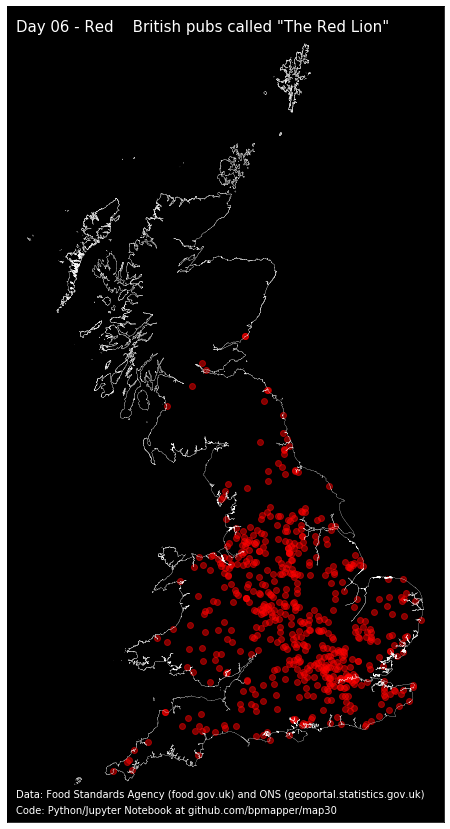

In [8]:
fig, ax=plt.subplots(figsize=(15,15))
gdf.plot(ax=ax, color='red',alpha=0.5)
gdfGB.plot(ax=ax, color='white', linewidth=0.1)
ax.text(.02,.97,'Day 06 - Red    British pubs called "The Red Lion"',transform=ax.transAxes, fontsize=15).set_color('white')
ax.text(.02,.03,'Data: Food Standards Agency (food.gov.uk) and ONS (geoportal.statistics.gov.uk)',transform=ax.transAxes, fontsize=10).set_color('white')       
ax.text(.02,.01,'Code: Python/Jupyter Notebook at github.com/bpmapper/map30',transform=ax.transAxes, fontsize=10).set_color('white')       
plt.tick_params(axis='both',which='both',bottom=False,left=False,labelbottom=False,labelleft=False)
ax.set_facecolor('black')
fig.savefig('Day06_Red.png')

plt.show()

In [9]:
dfX.Name.value_counts()

The Red Lion                           207
Red Lion                               148
Red Lion Hotel                          37
Red Lion Inn                            36
Red Lion Public House                   17
                                      ... 
Red Lion Caravan Site Store              1
Red Lion Wine                            1
Red Lion Newsagent                       1
Red Lion Restaurant                      1
Red Lion Farm Tea Rooms & Farm Shop      1
Name: Name, Length: 84, dtype: int64

In [10]:
dfX

,Name,Type,Lon,Lat,PostCode,Rating,dtRate,geometry
10,Boneyard Red Lion Works,Restaurant/Cafe/Canteen,-3.522345,50.727550,EX1 2AL,5,19 February 2020,POINT (-3.52235 50.72755)
12,BP Service Station Red Lion,Retailers - other,-2.206513,53.396076,SK8 2BG,5,27 June 2017,POINT (-2.20651 53.39608)
60,Creative Care - The Old Red Lion,Caring Premises,-0.825099,53.303978,DN22 0EJ,5,14 August 2018,POINT (-0.82510 53.30398)
65,"Eat, Drink & Sleep Ltd T/a The Red Lion Inn",Pub/bar/nightclub,-2.280184,52.515020,DY7 5DU,3,17 September 2019,POINT (-2.28018 52.51502)
82,Jamps at the Red Lion,Restaurant/Cafe/Canteen,-1.109607,53.432686,DN11 9LX,5,03 September 2020,POINT (-1.10961 53.43269)
...,...,...,...,...,...,...,...,...
1485,Ye Olde Red Lion,Pub/bar/nightclub,-0.766669,53.838524,YO43 4AD,5,03 September 2018,POINT (-0.76667 53.83852)
1486,Ye Olde Red Lion,Pub/bar/nightclub,-0.179996,52.918934,PE20 3EF,5,14 September 2018,POINT (-0.18000 52.91893)
1487,Ye Olde Red Lion,Pub/bar/nightclub,-1.315506,51.458840,RG20 8XB,4,08 March 2019,POINT (-1.31551 51.45884)
1488,Ye Olde Red Lion,Pub/bar/nightclub,-2.456642,53.413853,WA3 6JT,0,20 December 2019,POINT (-2.45664 53.41385)


In [11]:
psoup.find("ItemCount").text

'1490'

In [12]:
dfX.Type.value_counts()

Pub/bar/nightclub                    493
Restaurant/Cafe/Canteen               43
Hotel/bed & breakfast/guest house     25
Retailers - other                      8
Takeaway/sandwich shop                 3
Other catering premises                3
Caring Premises                        1
Mobile caterer                         1
Name: Type, dtype: int64

In [13]:
dfPubs=dfX[dfX.Type=='Pub/bar/nightclub']
dfPubs.head()

,Name,Type,Lon,Lat,PostCode,Rating,dtRate,geometry
65,"Eat, Drink & Sleep Ltd T/a The Red Lion Inn",Pub/bar/nightclub,-2.280184,52.515020,DY7 5DU,3,17 September 2019,POINT (-2.28018 52.51502)
124,Old Red Lion,Pub/bar/nightclub,-0.176781,51.891033,SG2 9XR,5,22 July 2019,POINT (-0.17678 51.89103)
125,Old Red Lion,Pub/bar/nightclub,-0.872310,52.525340,LE16 7UJ,5,18 March 2020,POINT (-0.87231 52.52534)
126,Old Red Lion,Pub/bar/nightclub,-1.451508,53.826843,LS14 2AD,5,20 September 2019,POINT (-1.45151 53.82684)
127,Old Red Lion,Pub/bar/nightclub,-2.398072,51.131508,BA10 0JL,5,27 August 2020,POINT (-2.39807 51.13151)
